In [1]:
library(grid)
library(rpart)
library(rpart.plot)
library(partykit)
library(lattice)
library(ggplot2)
library(caret)

In [2]:
set.seed(1)

In [3]:
invalids <- c('Time', 'Longitude', 'Latitude', 'Brake', 'Accel', 'flag')
isValidColumn <- function(x) {
    if (x %in% invalids) {
        return(FALSE)
    }
    return(TRUE)
}

# Predict Red A or Not

In [4]:
df <- read.csv("../data/middle/sp.csv", stringsAsFactors=FALSE)

In [5]:
df$flag[df$flag == "RedB"] <- "ELSE"
df$flag[df$flag == "BlueA"] <- "ELSE"
df$flag[df$flag == "BlueB"] <- "ELSE"
df$flag <- as.factor(df$flag)

In [6]:
allFeatures <- c(colnames(df))
features <- Filter(isValidColumn, allFeatures)

In [7]:
expr <- paste("flag ~ ", paste(features, collapse=" + "))

In [8]:
folds <- createFolds(df$flag)

In [9]:
nred <- nrow(df[df$flag == "RedA", ])
sprintf("RedA/all = %f", as.numeric(nred)/nrow(df))

[1] "RedA/all = 0.387817"

In [10]:
errs <- c()
for (ids in folds) {
    train <- df[-ids, ]
    test <- df[ids, ]
    fit <- rpart(expr, data=train, method="class")
    p <- predict(fit, newdata=test)
    res <- colnames(p)[max.col(p, ties.method = "first")] == test$flag
    errs <- c(errs, table(res)["FALSE"] / nrow(test))
}
sprintf("CV value: %f", mean(errs))

[1] "CV value: 0.368581"

In [11]:
fit <- rpart(expr, data=df, method="class")

In [12]:
printcp(fit)


Classification tree:
rpart(formula = expr, data = df, method = "class")

Variables actually used in tree construction:
[1] AccelerationSpeed Curve             Jerk              RedLamp          
[5] RiskFactor        RoadType          Speed             TimeHeadway      

Root node error: 382/985 = 0.38782

n= 985 

        CP nsplit rel error  xerror     xstd
1 0.034904      0   1.00000 1.00000 0.040032
2 0.020942      3   0.89529 0.98691 0.039934
3 0.020070      5   0.85340 0.98429 0.039914
4 0.014398      8   0.79319 0.95026 0.039634
5 0.013089     11   0.74869 0.95550 0.039679
6 0.012216     13   0.72251 0.95288 0.039657
7 0.010471     18   0.65969 0.97120 0.039810
8 0.010000     20   0.63874 0.97120 0.039810


In [13]:
summary(fit)

Call:
rpart(formula = expr, data = df, method = "class")
  n= 985 

          CP nsplit rel error    xerror       xstd
1 0.03490401      0 1.0000000 1.0000000 0.04003214
2 0.02094241      3 0.8952880 0.9869110 0.03993383
3 0.02006981      5 0.8534031 0.9842932 0.03991362
4 0.01439791      8 0.7931937 0.9502618 0.03963392
5 0.01308901     11 0.7486911 0.9554974 0.03967901
6 0.01221640     13 0.7225131 0.9528796 0.03965656
7 0.01047120     18 0.6596859 0.9712042 0.03980977
8 0.01000000     20 0.6387435 0.9712042 0.03980977

Variable importance
            Speed        RiskFactor       TimeHeadway          RoadType 
               16                15                15                11 
    AheadDistance AccelerationSpeed          PathType            Engine 
                8                 7                 6                 4 
            Pitch         LaneCount           RedLamp   TimeToCollision 
                4                 3                 3                 2 
            Cu

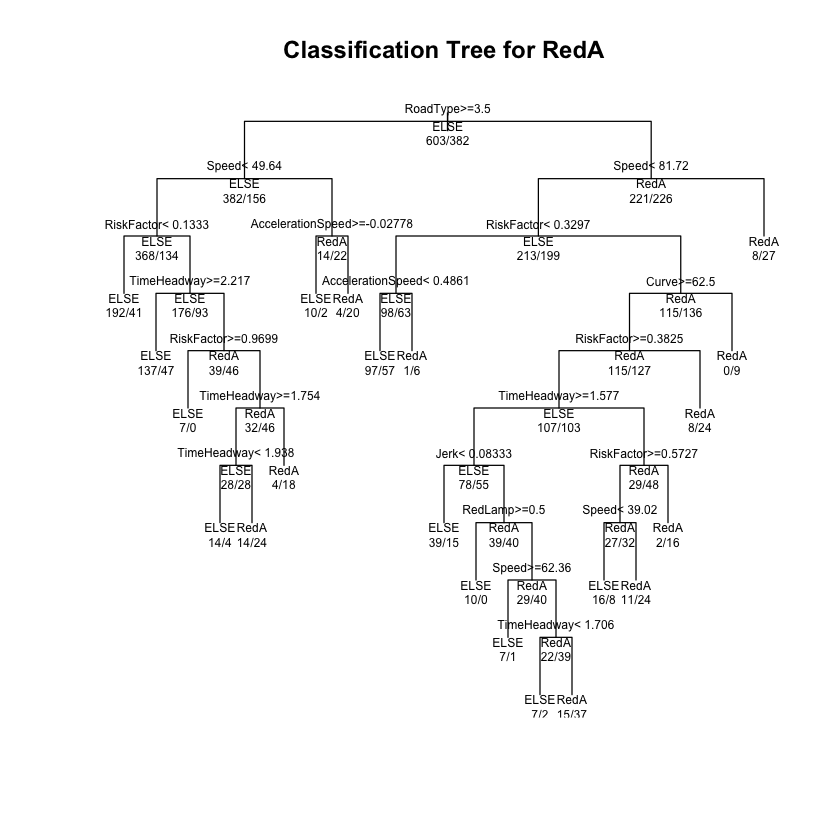

In [14]:
plot(fit, uniform=TRUE, main="Classification Tree for RedA")
text(fit, use.n=TRUE, all=TRUE, cex=.6)

# Predict Red B

In [15]:
df2 <- read.csv("../data/middle/sp.csv", stringsAsFactors=FALSE)

In [16]:
df2$flag[df2$flag == "RedA"] <- "ELSE"
df2$flag[df2$flag == "BlueA"] <- "ELSE"
df2$flag[df2$flag == "BlueB"] <- "ELSE"
df2$flag <- as.factor(df2$flag)

In [17]:
folds2 <- createFolds(df2$flag)

In [18]:
nred <- nrow(df2[df2$flag == "RedB", ])
sprintf("RedB/all = %f", as.numeric(nred)/nrow(df))

[1] "RedB/all = 0.186802"

In [19]:
errs <- c()
for (ids in folds2) {
    train <- df2[-ids, ]
    test <- df2[ids, ]
    fit <- rpart(expr, data=train, method="class")
    p <- predict(fit, newdata=test)
    res <- colnames(p)[max.col(p, ties.method = "first")] == test$flag
    errs <- c(errs, table(res)["FALSE"] / nrow(test))
}
sprintf("CV value: %f", mean(errs))

[1] "CV value: 0.205025"

In [20]:
fit2 <- rpart(expr, data=df2, method="class")

In [21]:
printcp(fit2)


Classification tree:
rpart(formula = expr, data = df2, method = "class")

Variables actually used in tree construction:
[1] AccelerationSpeed DistSignal        Engine            Pitch            
[5] Speed             TimeHeadway       TimeToCollision  

Root node error: 184/985 = 0.1868

n= 985 

        CP nsplit rel error  xerror     xstd
1 0.070652      0   1.00000 1.00000 0.066480
2 0.027174      1   0.92935 0.95652 0.065342
3 0.019022      2   0.90217 0.94565 0.065050
4 0.017663      4   0.86413 0.94565 0.065050
5 0.010000      9   0.76630 1.03261 0.067301


In [22]:
summary(fit2)

Call:
rpart(formula = expr, data = df2, method = "class")
  n= 985 

          CP nsplit rel error    xerror       xstd
1 0.07065217      0 1.0000000 1.0000000 0.06647973
2 0.02717391      1 0.9293478 0.9565217 0.06534234
3 0.01902174      2 0.9021739 0.9456522 0.06505027
4 0.01766304      4 0.8641304 0.9456522 0.06505027
5 0.01000000      9 0.7663043 1.0326087 0.06730145

Variable importance
       DistSignal             Speed          RoadType   TimeToCollision 
               15                14                11                10 
AccelerationSpeed            Engine             Curve     AheadDistance 
                9                 8                 8                 7 
      TimeHeadway             Pitch     SteeringAngle              Jerk 
                5                 4                 3                 2 
       RiskFactor          PathType 
                2                 2 

Node number 1: 985 observations,    complexity param=0.07065217
  predicted class=ELSE  exp

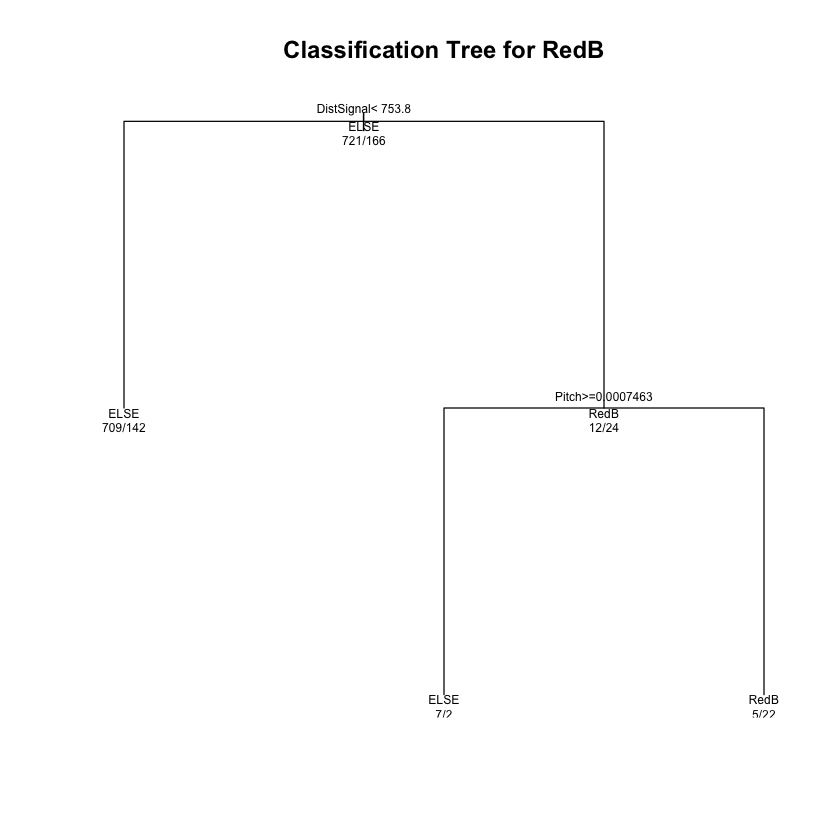

In [23]:
plot(fit, uniform=TRUE, main="Classification Tree for RedB")
text(fit, use.n=TRUE, all=TRUE, cex=.6)

# Predict Red

In [24]:
df3 <- read.csv("../data/middle/sp.csv", stringsAsFactors=FALSE)

In [25]:
df3$flag[df3$flag == "RedA"] <- "Red"
df3$flag[df3$flag == "RedB"] <- "Red"
df3$flag[df3$flag == "BlueA"] <- "Blue"
df3$flag[df3$flag == "BlueB"] <- "Blue"
df3$flag <- as.factor(df3$flag)

In [26]:
nred <- nrow(df3[df3$flag == "Red", ])
sprintf("Red/all = %f", as.numeric(nred)/nrow(df))

[1] "Red/all = 0.574619"

In [27]:
folds3 <- createFolds(df3$flag)

In [28]:
errs <- c()
for (ids in folds3) {
    train <- df3[-ids, ]
    test <- df3[ids, ]
    fit <- rpart(expr, data=train, method="class")
    p <- predict(fit, newdata=test)
    res <- colnames(p)[max.col(p, ties.method = "first")] == test$flag
    errs <- c(errs, table(res)["FALSE"] / nrow(test))
}
sprintf("CV value: %f", mean(errs))

[1] "CV value: 0.394135"

In [29]:
fit3 <- rpart(expr, data=df3, method="class")

In [31]:
summary(fit3)

Call:
rpart(formula = expr, data = df3, method = "class")
  n= 985 

          CP nsplit rel error    xerror       xstd
1 0.03436754      0 1.0000000 1.0000000 0.03703250
2 0.02386635      5 0.8281623 0.9284010 0.03661557
3 0.01670644      7 0.7804296 0.9260143 0.03659914
4 0.01431981      9 0.7470167 0.8949881 0.03637043
5 0.01312649     10 0.7326969 0.9093079 0.03647950
6 0.01193317     12 0.7064439 0.8973747 0.03638903
7 0.01000000     13 0.6945107 0.8997613 0.03640746

Variable importance
       RiskFactor        DistSignal   TimeToCollision       TimeHeadway 
               14                13                13                12 
    AheadDistance             Speed AccelerationSpeed          RoadType 
                9                 8                 7                 7 
            Curve    DistManBicycle     SteeringAngle            Engine 
                7                 3                 2                 2 
        LaneCount        ManBicycle   ManBicycleCount 
         